In [1]:
import os
import cv2
import pandas as pd
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Daraset reduction to 100 labels

In [3]:
main_gestures = [
    "Привет!", "Пока", "да", "не", "благодарность", "Я", "мать", "отец", "сын", "дочь",
    "сестра", "брат", "ребёнок", "жена", "муж", "мужчина", "женщина", "семья", "меня",
    "тебя", "мне", "ты", "тебе", "ваш", "утро", "день", "ночь", "год", "месяц", "сегодня",
    "завтра", "вчера", "редко", "часто", "немного", "много", "больше", "тёплый", "холодный",
    "деньги", "цена", "дом", "работать", "школа", "магазин", "комната", "время",
    "дорога", "собака", "кошка", "попугай", "птица", "рыба", "дикое животное", "домашнее животное",
    "красный", "оранжевый", "желтый", "зелёный", "синий", "фиолетовый", "черный",
    "белый", "серый", "бежевый", "Золото", "серебро", "кто?", "что", "что-нибудь", "когда",
    "который", "вода", "еда", "болит", "нуждаться", "хотеть", "иметь", "быть", "любить", "ждать",
    "купить", "найти", "нравиться", "говорить", "позволить", "помочь", "терять", "добрый", "агрессивный",
    "расстроенный", "напуганный", "сtextчастливый", "сильный", "недобрый", "красивый",
    "резервирование; бронирование", "кафетерий", "женский туалет", "мужской туалет"
]

In [2]:
DATA_DIR = 'slovo'
TRAIN_DIR = os.path.join(DATA_DIR, 'train_100')
TEST_DIR = os.path.join(DATA_DIR, 'test_100')
ann_100 = pd.read_csv(os.path.join(DATA_DIR, 'annotations_100.csv'))
ann_100

,attachment_id,text,user_id,height,width,length,train,frame_count,height_width
0,5ce6ce8a-d191-47d4-97b4-3fc6f9138a73,я,185bd3a81d9d618518d10abebf0d17a8,1920,1080,91.0,True,51,1920_1080
1,c9e2dbd1-ec2f-4382-a80e-5bca8396a9b1,я,46dd04a1caa75ed3082b573cb5a3ad26,1920,1080,58.0,True,58,1920_1080
2,3f72244c-7379-4403-b7ee-e1b1b8d78d46,я,db573f94204e56e0cf3fc2ea000e5bdc,1280,720,49.0,True,49,1280_720
3,5adf08e2-4ff6-4183-ba22-446c1cd0b0f8,я,0211b488644476dd0fec656ccb9b74fc,1920,1080,50.0,True,50,1920_1080
4,13a148fc-a546-47ab-b5d0-f9d0c3cce1de,я,2d84da20c251acaeb3186642fcb04f2e,1920,1080,27.0,True,27,1920_1080
...,...,...,...,...,...,...,...,...,...
1995,74db1174-1314-43c7-bb8a-cc5cce5e2510,редко,f2dc6eab563f93d86629c1cfe479f09d,1440,1440,56.0,False,56,1440_1440
1996,5d742908-98ce-4172-bb2f-02f3595860a4,редко,798aa826b6129d33f72f62d4ba60b681,720,1280,61.0,False,61,720_1280
1997,dfe2ff4c-98fa-4ead-b861-f499f570a321,месяц,798aa826b6129d33f72f62d4ba60b681,720,1280,58.0,False,58,720_1280
1998,04856a31-8326-49cb-8e0c-0843c64a1d92,время,798aa826b6129d33f72f62d4ba60b681,720,1280,52.0,False,52,720_1280


In [5]:
ann_100[ann_100['text'] == 'сильный']

,attachment_id,text,user_id,height,width,length,train,frame_count,height_width
121,57b0ac71-5e34-4c19-8d13-bc1731ba3270,сильный,db573f94204e56e0cf3fc2ea000e5bdc,1280,720,54.0,True,54,1280_720
127,d2390a88-39aa-41b8-9e82-6b134dfb66cd,сильный,0211b488644476dd0fec656ccb9b74fc,1920,1080,34.0,True,34,1920_1080
130,07610ea9-512b-4381-a9bb-99801b608439,сильный,db573f94204e56e0cf3fc2ea000e5bdc,1280,720,36.0,True,36,1280_720
139,d3d0063f-dd5d-429e-86a9-7bf668b6e4af,сильный,0211b488644476dd0fec656ccb9b74fc,1920,1080,35.0,True,35,1920_1080
157,7275c2e7-3b35-48b0-bdc1-261cf33bb835,сильный,db573f94204e56e0cf3fc2ea000e5bdc,1280,720,48.0,True,48,1280_720
165,053d3cfc-a4e8-461d-97b1-00035eed0496,сильный,0211b488644476dd0fec656ccb9b74fc,1920,1080,32.0,True,32,1920_1080
534,bc13c574-e438-4c60-b174-eecae48114f1,сильный,0211b488644476dd0fec656ccb9b74fc,1920,1080,41.0,True,41,1920_1080
566,f3852376-5a0d-4245-b7ce-b2c569618893,сильный,db573f94204e56e0cf3fc2ea000e5bdc,1280,720,45.0,True,45,1280_720
679,6c0e213e-98b2-4a49-a564-9f79b7f6f3af,сильный,db573f94204e56e0cf3fc2ea000e5bdc,1280,720,42.0,True,42,1280_720
738,5bfa0638-1c8c-45ef-93c5-17fe7735e29d,сильный,0211b488644476dd0fec656ccb9b74fc,1920,1080,38.0,True,38,1920_1080


In [19]:
ann_100_train = ann_100[ann_100['train'] == True]
ann_100_test = ann_100[ann_100['train'] == False]

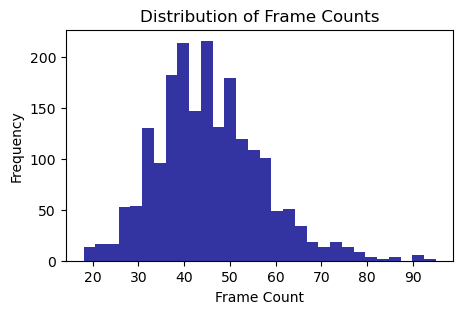

In [28]:
plt.figure(figsize=(5, 3))
plt.hist(ann_100['frame_count'], bins=30, color='darkblue',  alpha = 0.8)
plt.title('Distribution of Frame Counts')
plt.xlabel('Frame Count')
plt.ylabel('Frequency')
plt.show()

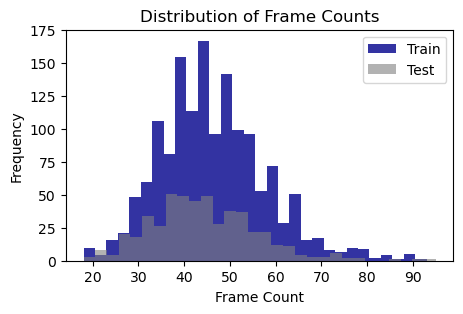

In [26]:
plt.figure(figsize=(5, 3))
plt.hist(ann_100_train['frame_count'], bins=30, color='darkblue', alpha=0.8, label='Train')
plt.hist(ann_100_test['frame_count'], bins=30, color='grey', alpha=0.6, label='Test')
plt.title('Distribution of Frame Counts')
plt.xlabel('Frame Count')
plt.ylabel('Frequency')
plt.legend()  # Добавление легенды
plt.show()

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(ann_100_train['frame_count'], bins=30, color='darkblue',  alpha = 0.8)
plt.hist(ann_100_test['frame_count'], bins=30, color='grey',  alpha = 0.6)
plt.title('Distribution of Frame Counts')
plt.xlabel('Frame Count')
plt.ylabel('Frequency')
plt.show()

In [6]:
ann_100['frame_count'].describe()

count    2000.00000
mean       45.61800
std        11.66225
min        18.00000
25%        38.00000
50%        44.50000
75%        52.00000
max        95.00000
Name: frame_count, dtype: float64

In [14]:
num_users = len(ann_100['user_id'].unique()) 
users_dict = {label: label_id for label, label_id in zip(ann_100['user_id'].unique(), range(num_users))} 

ann_100['user_num'] = ann_100['user_id'].map(users_dict)

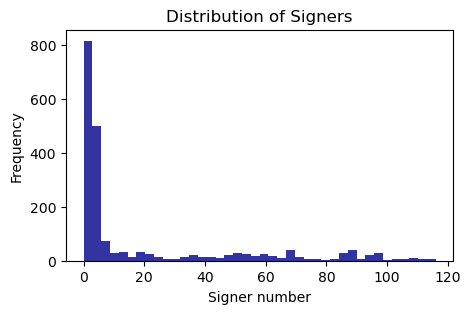

In [49]:
plt.figure(figsize=(5, 3))
plt.hist(ann_100['user_num'], bins=40, color='darkblue',  alpha = 0.8)
plt.title('Distribution of Signers')
plt.xlabel('Signer number')
plt.ylabel('Frequency')
plt.show()

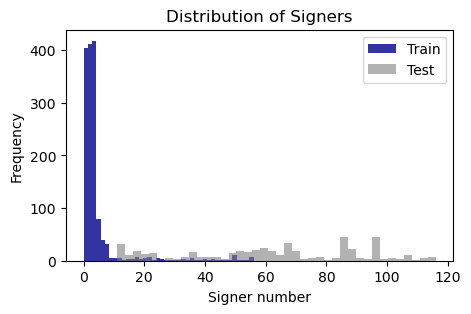

In [50]:
plt.figure(figsize=(5, 3))
# plt.title('Distribution of Frame Counts')
plt.hist(ann_100_train['user_num'], bins=40, color='darkblue',  alpha = 0.8, label='Train')
plt.hist(ann_100_test['user_num'], bins=40, color='grey',  alpha = 0.6, label='Test')
plt.title('Distribution of Signers')
plt.xlabel('Signer number')
plt.ylabel('Frequency')
plt.legend()  # Добавление легенды
plt.show()


In [48]:
ann_100_test[ann_100_test['user_id'] == '0211b488644476dd0fec656ccb9b74fc']


,attachment_id,text,user_id,height,width,length,train,frame_count,height_width,user_num


In [ ]:
ann_100['height_width'].value_counts().plot(kind='bar', color='darkblue',  alpha = 0.8)

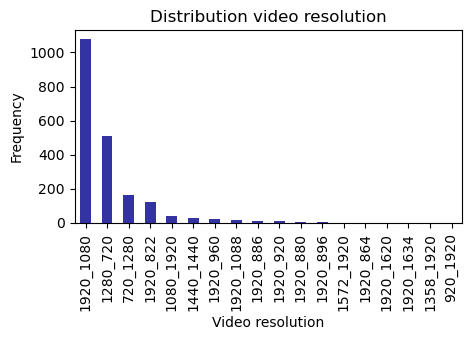

In [61]:
plt.figure(figsize=(5, 2.5))
ann_100['height_width'].value_counts().plot(kind='bar', color='darkblue', alpha = 0.8)
plt.title('Distribution video resolution')
plt.xlabel('Video resolution')
plt.ylabel('Frequency')
plt.show()

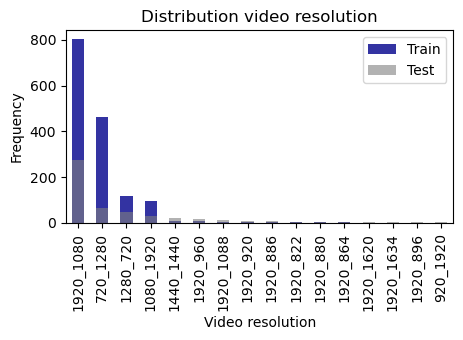

In [62]:
plt.figure(figsize=(5, 2.5))
ann_100_train['height_width'].value_counts().plot(kind='bar', color='darkblue', alpha = 0.8, label='Train')
ann_100_test['height_width'].value_counts().plot(kind='bar', color='grey',  alpha = 0.6, label='Test')
plt.title('Distribution video resolution')
plt.xlabel('Video resolution')
plt.legend()  # Добавление легенды
plt.ylabel('Frequency')
plt.show()